In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def stock_analysis(stock1, stock2, days):
    # Coleta as informações de estoque dos últimos 45 dias
    start_date = pd.Timestamp.today() - pd.Timedelta(days=days)
    end_date = pd.Timestamp.today()
    end_date_by_2 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/2))
    end_date_by_4 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/4))
    end_date_by_8 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/8))
    stock1_data = yf.download(stock1, start=start_date, end=end_date)
    stock2_data = yf.download(stock2, start=start_date, end=end_date)
    # Calcula a divisão dos valores de fechamento das ações
    stock_division = stock1_data['Close'] / stock2_data['Close']
    print(end_date_by_2)
    # Calcula a regressão linear
    X = np.arange(len(stock_division)).reshape(-1, 1)
    y = stock_division.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    linear_regression = reg.predict(X)

    # Calcula o desvio padrão
    std = stock_division.std()
    std2 = stock_division.loc[stock_division.index <= end_date_by_2].std()
    std4 = stock_division.loc[stock_division.index <= end_date_by_4].std()
    std8 = stock_division.loc[stock_division.index <= end_date_by_8].std()


    # Cria um DataFrame com os resultados
    result_df = pd.DataFrame({
        'Dia': stock_division.index,
        f'valor {stock1}': stock1_data['Close'],
        f'valor {stock2}': stock2_data['Close'],
        f'{stock1}/{stock2}': stock_division.values,
        'desvio padrão': std,
        'desvio padrão /2': std2,
        'desvio padrão /4': std4,
        'desvio padrão /8': std8,
        'regressão linear': linear_regression.flatten(),
        'alpha': std / linear_regression.flatten(),
        'alpha /2': std2 / linear_regression.flatten(),
        'alpha /4': std4 / linear_regression.flatten(),
        'alpha /8': std8 / linear_regression.flatten()
    })

    return result_df


In [8]:
stock1 = "CPLE6.SA"
stock2 = "CMIG4.SA"

resultados = stock_analysis( stock1, stock2, 90)
resultados


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00


,Dia,valor CPLE6.SA,valor CMIG4.SA,CPLE6.SA/CMIG4.SA,desvio padrão,desvio padrão /2,desvio padrão /4,desvio padrão /8,regressão linear,alpha,alpha /2,alpha /4,alpha /8
Date,,,,,,,,,,,,,
2022-12-05,2022-12-05,7.75,10.99,0.705187,0.015029,0.016237,0.016008,0.015327,0.702744,0.021386,0.023106,0.022780,0.021810
2022-12-06,2022-12-06,7.84,11.16,0.702509,0.015029,0.016237,0.016008,0.015327,0.702159,0.021404,0.023125,0.022799,0.021828
2022-12-07,2022-12-07,8.03,11.32,0.709364,0.015029,0.016237,0.016008,0.015327,0.701574,0.021422,0.023144,0.022818,0.021846
2022-12-08,2022-12-08,7.82,10.99,0.711556,0.015029,0.016237,0.016008,0.015327,0.700989,0.021440,0.023163,0.022837,0.021864
2022-12-09,2022-12-09,7.70,11.08,0.694946,0.015029,0.016237,0.016008,0.015327,0.700404,0.021458,0.023183,0.022856,0.021883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,2023-02-27,7.12,10.55,0.674881,0.015029,0.016237,0.016008,0.015327,0.669394,0.022452,0.024257,0.023915,0.022896
2023-02-28,2023-02-28,7.05,10.48,0.672710,0.015029,0.016237,0.016008,0.015327,0.668809,0.022471,0.024278,0.023936,0.022916
2023-03-01,2023-03-01,7.01,10.44,0.671456,0.015029,0.016237,0.016008,0.015327,0.668224,0.022491,0.024299,0.023957,0.022936


In [10]:
resultados

,Dia,valor CPLE6.SA,valor CMIG4.SA,CPLE6.SA/CMIG4.SA,desvio padrão,desvio padrão /2,desvio padrão /4,desvio padrão /8,regressão linear,alpha,alpha /2,alpha /4,alpha /8
Date,,,,,,,,,,,,,
2022-12-05,2022-12-05,7.75,10.99,0.705187,0.015029,0.016237,0.016008,0.015327,0.702744,0.021386,0.023106,0.022780,0.021810
2022-12-06,2022-12-06,7.84,11.16,0.702509,0.015029,0.016237,0.016008,0.015327,0.702159,0.021404,0.023125,0.022799,0.021828
2022-12-07,2022-12-07,8.03,11.32,0.709364,0.015029,0.016237,0.016008,0.015327,0.701574,0.021422,0.023144,0.022818,0.021846
2022-12-08,2022-12-08,7.82,10.99,0.711556,0.015029,0.016237,0.016008,0.015327,0.700989,0.021440,0.023163,0.022837,0.021864
2022-12-09,2022-12-09,7.70,11.08,0.694946,0.015029,0.016237,0.016008,0.015327,0.700404,0.021458,0.023183,0.022856,0.021883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,2023-02-27,7.12,10.55,0.674881,0.015029,0.016237,0.016008,0.015327,0.669394,0.022452,0.024257,0.023915,0.022896
2023-02-28,2023-02-28,7.05,10.48,0.672710,0.015029,0.016237,0.016008,0.015327,0.668809,0.022471,0.024278,0.023936,0.022916
2023-03-01,2023-03-01,7.01,10.44,0.671456,0.015029,0.016237,0.016008,0.015327,0.668224,0.022491,0.024299,0.023957,0.022936


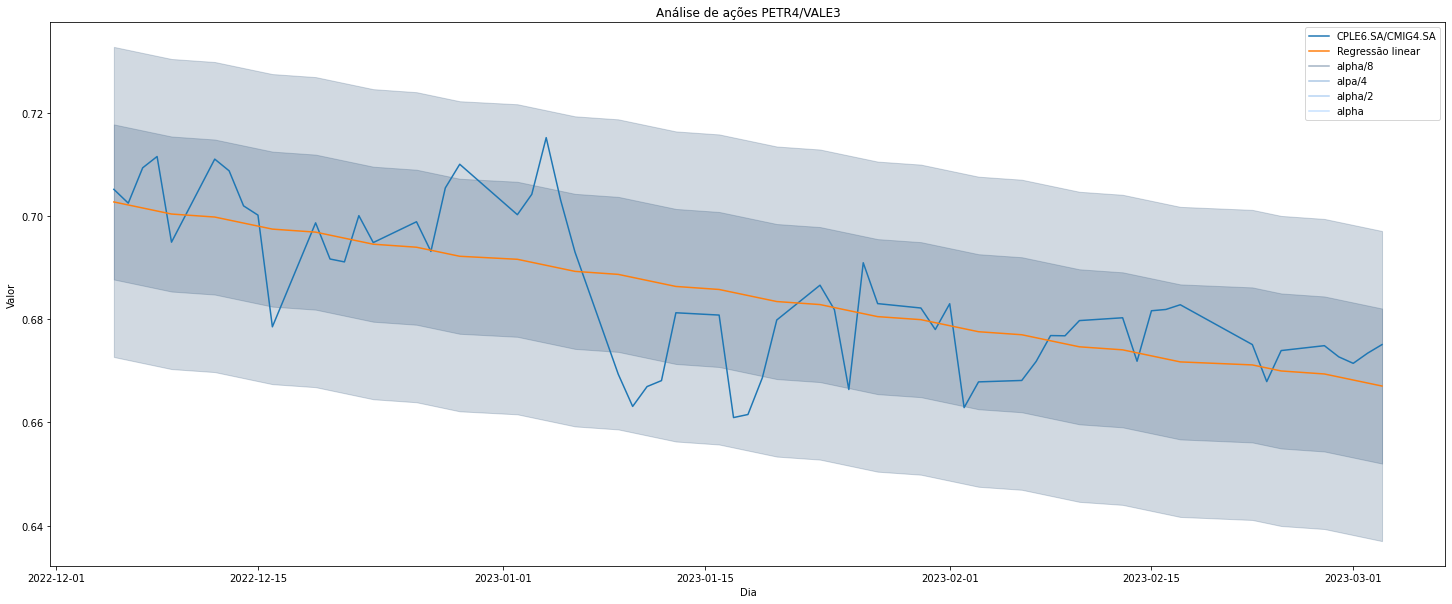

In [17]:
import matplotlib.pyplot as plt

# Chame a função stock_analysis para obter os dados
data = resultados

# Crie um gráfico com a divisão STOCK1/STOCK2 e a linha da regressão linear
fig, ax = plt.subplots()
ax.plot(data['Dia'], data[f'{stock1}/{stock2}'], label=stock1+"/"+stock2)
ax.plot(data['Dia'], data['regressão linear'], label='Regressão linear')

# Adicione sombras para os intervalos de alpha
# ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /8'], data['regressão linear'] + data['alpha /8'], alpha=0.2, color='#19416b')
# ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /4'], data['regressão linear'] + data['alpha /4'], alpha=0.2, color='#3175bd')
# ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /2'], data['regressão linear'] + data['alpha /2'], alpha=0.2, color='#4a94e3')
# ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha'], data['regressão linear'] + data['alpha'], alpha=0.2, color='#71b6ff')
ax.fill_between(data['Dia'], data['regressão linear'] - 2*data['desvio padrão'], data['regressão linear'] + 2*data['desvio padrão'], alpha=0.2, color='#19416b')
ax.fill_between(data['Dia'], data['regressão linear'] - data['desvio padrão'], data['regressão linear'] + data['desvio padrão'], alpha=0.2, color='#19416b')

# Adicione legendas para as sombras dos intervalos de alpha
alpha_legend = [
    (data['alpha /8'], '#19416b', 'alpha/8')
    ,(data['alpha /4'], '#3175bd', 'alpa/4')
    ,(data['alpha /2'], '#4a94e3', 'alpha/2')
    ,(data['alpha'], '#71b6ff', 'alpha')
]
for alpha, color, label in alpha_legend:
    ax.plot([], [], color=color, alpha=0.4, label=label)

# Adicione legendas e rótulos aos eixos
ax.legend()
ax.set_xlabel('Dia')
ax.set_ylabel('Valor')
ax.set_title('Análise de ações PETR4/VALE3')

# Ajuste o tamanho da figura
fig.set_size_inches(25, 10)

# Exiba o gráfico
plt.show()
